In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data preprocessing


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17112 files belonging to 9 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4278 files belonging to 9 classes.


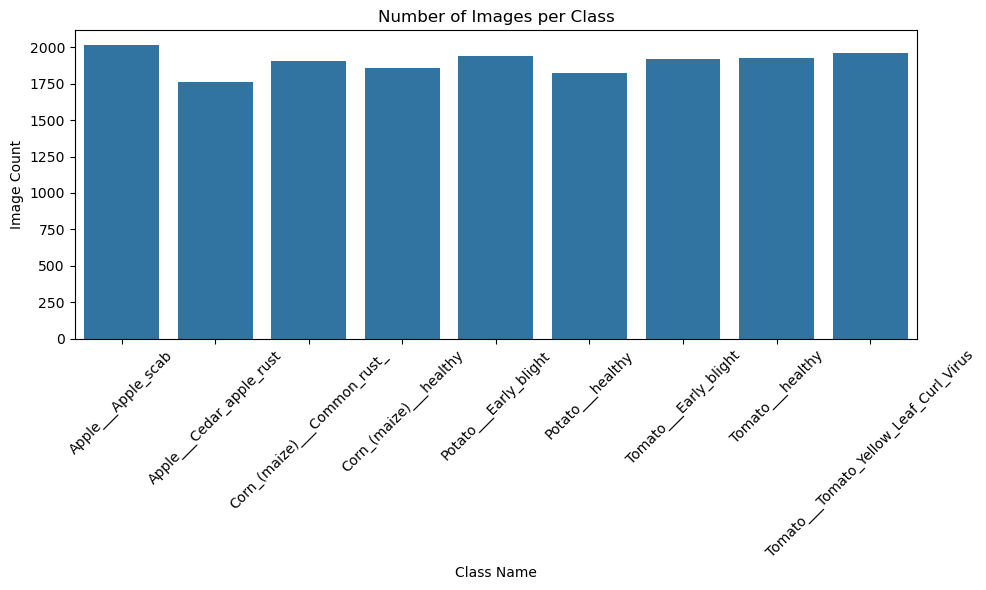

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os

# Assuming 'train_dir' has one folder per class
train_dir = 'train'  # update this path
classes = os.listdir(train_dir)
class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes}

plt.figure(figsize=(10,6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title('Number of Images per Class')
plt.xticks(rotation=45)
plt.ylabel('Image Count')
plt.xlabel('Class Name')
plt.tight_layout()
plt.show()


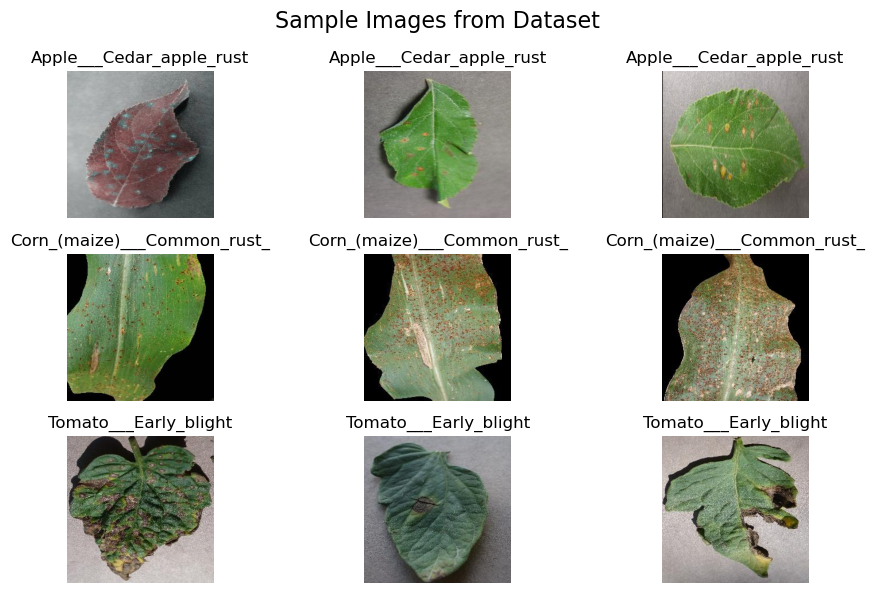

In [5]:
import matplotlib.pyplot as plt
import cv2
import random

plt.figure(figsize=(10, 6))
sample_classes = random.sample(classes, 3)

for idx, cls in enumerate(sample_classes):
    folder_path = os.path.join(train_dir, cls)
    sample_images = random.sample(os.listdir(folder_path), 3)
    
    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(3, 3, idx*3 + j + 1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')

plt.suptitle("Sample Images from Dataset", fontsize=16)
plt.tight_layout()
plt.show()


## Model Building

In [6]:
## Model Building
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model=Sequential()

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\sibghatullah\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) #to avoid overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))


In [16]:
model.add(Dropout(0.40))

In [17]:
model.add(Dense(units=9,activation='softmax'))

In [18]:
from keras.optimizers import Adam

In [19]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model.compile(tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │          13,509 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,799,233 (29.75 MB)

 Trainable params: 7,799,233 (29.75 MB)

 Non-trainable params: 0 (0.00 B)

## Training 

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=5)

Epoch 1/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 3103s 6s/step - accuracy: 0.5462 - loss: 1.3631 - val_accuracy: 0.9362 - val_loss: 0.1807
Epoch 2/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 3021s 6s/step - accuracy: 0.9179 - loss: 0.2424 - val_accuracy: 0.9532 - val_loss: 0.1487
Epoch 3/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 3024s 6s/step - accuracy: 0.9556 - loss: 0.1335 - val_accuracy: 0.9528 - val_loss: 0.1451
Epoch 4/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 3027s 6s/step - accuracy: 0.9635 - loss: 0.1100 - val_accuracy: 0.9780 - val_loss: 0.0672
Epoch 5/5
535/535 ━━━━━━━━━━━━━━━━━━━━ 3047s 6s/step - accuracy: 0.9746 - loss: 0.0802 - val_accuracy: 0.9712 - val_loss: 0.0972


## Model Evaluation

In [22]:
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

535/535 ━━━━━━━━━━━━━━━━━━━━ 1065s 2s/step - accuracy: 0.9772 - loss: 0.0730
Training accuracy: 0.9784361720085144


In [23]:
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

134/134 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.9713 - loss: 0.1022
Validation accuracy: 0.9712482690811157


## Model Saving

In [24]:
model.save('trained_plant_dataSet.keras')

In [25]:
training_history.history #Return Dictionary of history


{'accuracy': [0.7432795763015747,
  0.9307503700256348,
  0.9575151801109314,
  0.9667484760284424,
  0.9738779664039612],
 'loss': [0.7388446927070618,
  0.20285798609256744,
  0.12962037324905396,
  0.09900311380624771,
  0.0839025154709816],
 'val_accuracy': [0.9361851215362549,
  0.9532491564750671,
  0.9527816772460938,
  0.9780271053314209,
  0.9712482690811157],
 'val_loss': [0.1806698888540268,
  0.1487312912940979,
  0.14512066543102264,
  0.06723255664110184,
  0.09717578440904617]}

In [26]:
#Recording History in json
import json
with open('training_history1.json','w') as f:
  json.dump(training_history.history,f)

In [27]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## Accuracy Visualization

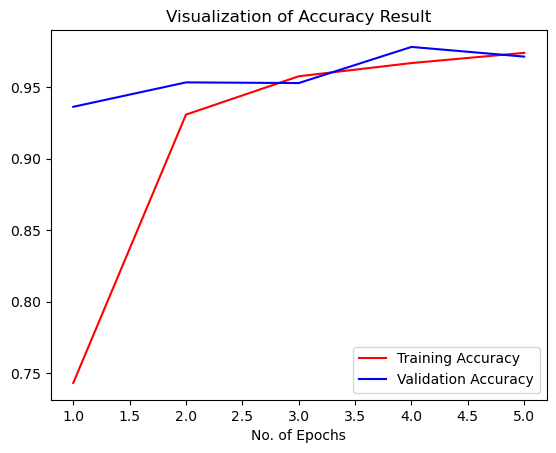

In [28]:
epochs = [i for i in range(1,6)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other matrics for evaluation of accuracy

In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4278 files belonging to 9 classes.


In [31]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

4278/4278 ━━━━━━━━━━━━━━━━━━━━ 236s 55ms/step


In [32]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [33]:
Y_true

<tf.Tensor: shape=(4278,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [34]:
predicted_categories

<tf.Tensor: shape=(4278,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [36]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                        precision    recall  f1-score   support

                    Apple___Apple_scab       0.95      0.97      0.96       504
              Apple___Cedar_apple_rust       0.95      0.88      0.91       440
           Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
                Corn_(maize)___healthy       0.99      1.00      0.99       465
                 Potato___Early_blight       0.98      0.99      0.98       485
                      Potato___healthy       0.97      0.98      0.97       456
                 Tomato___Early_blight       0.95      0.95      0.95       480
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.96      1.00      0.98       490
                      Tomato___healthy       0.99      0.98      0.99       481

                              accuracy                           0.97      4278
                             macro avg       0.97      0.97      0.97      4278
                          weighted avg

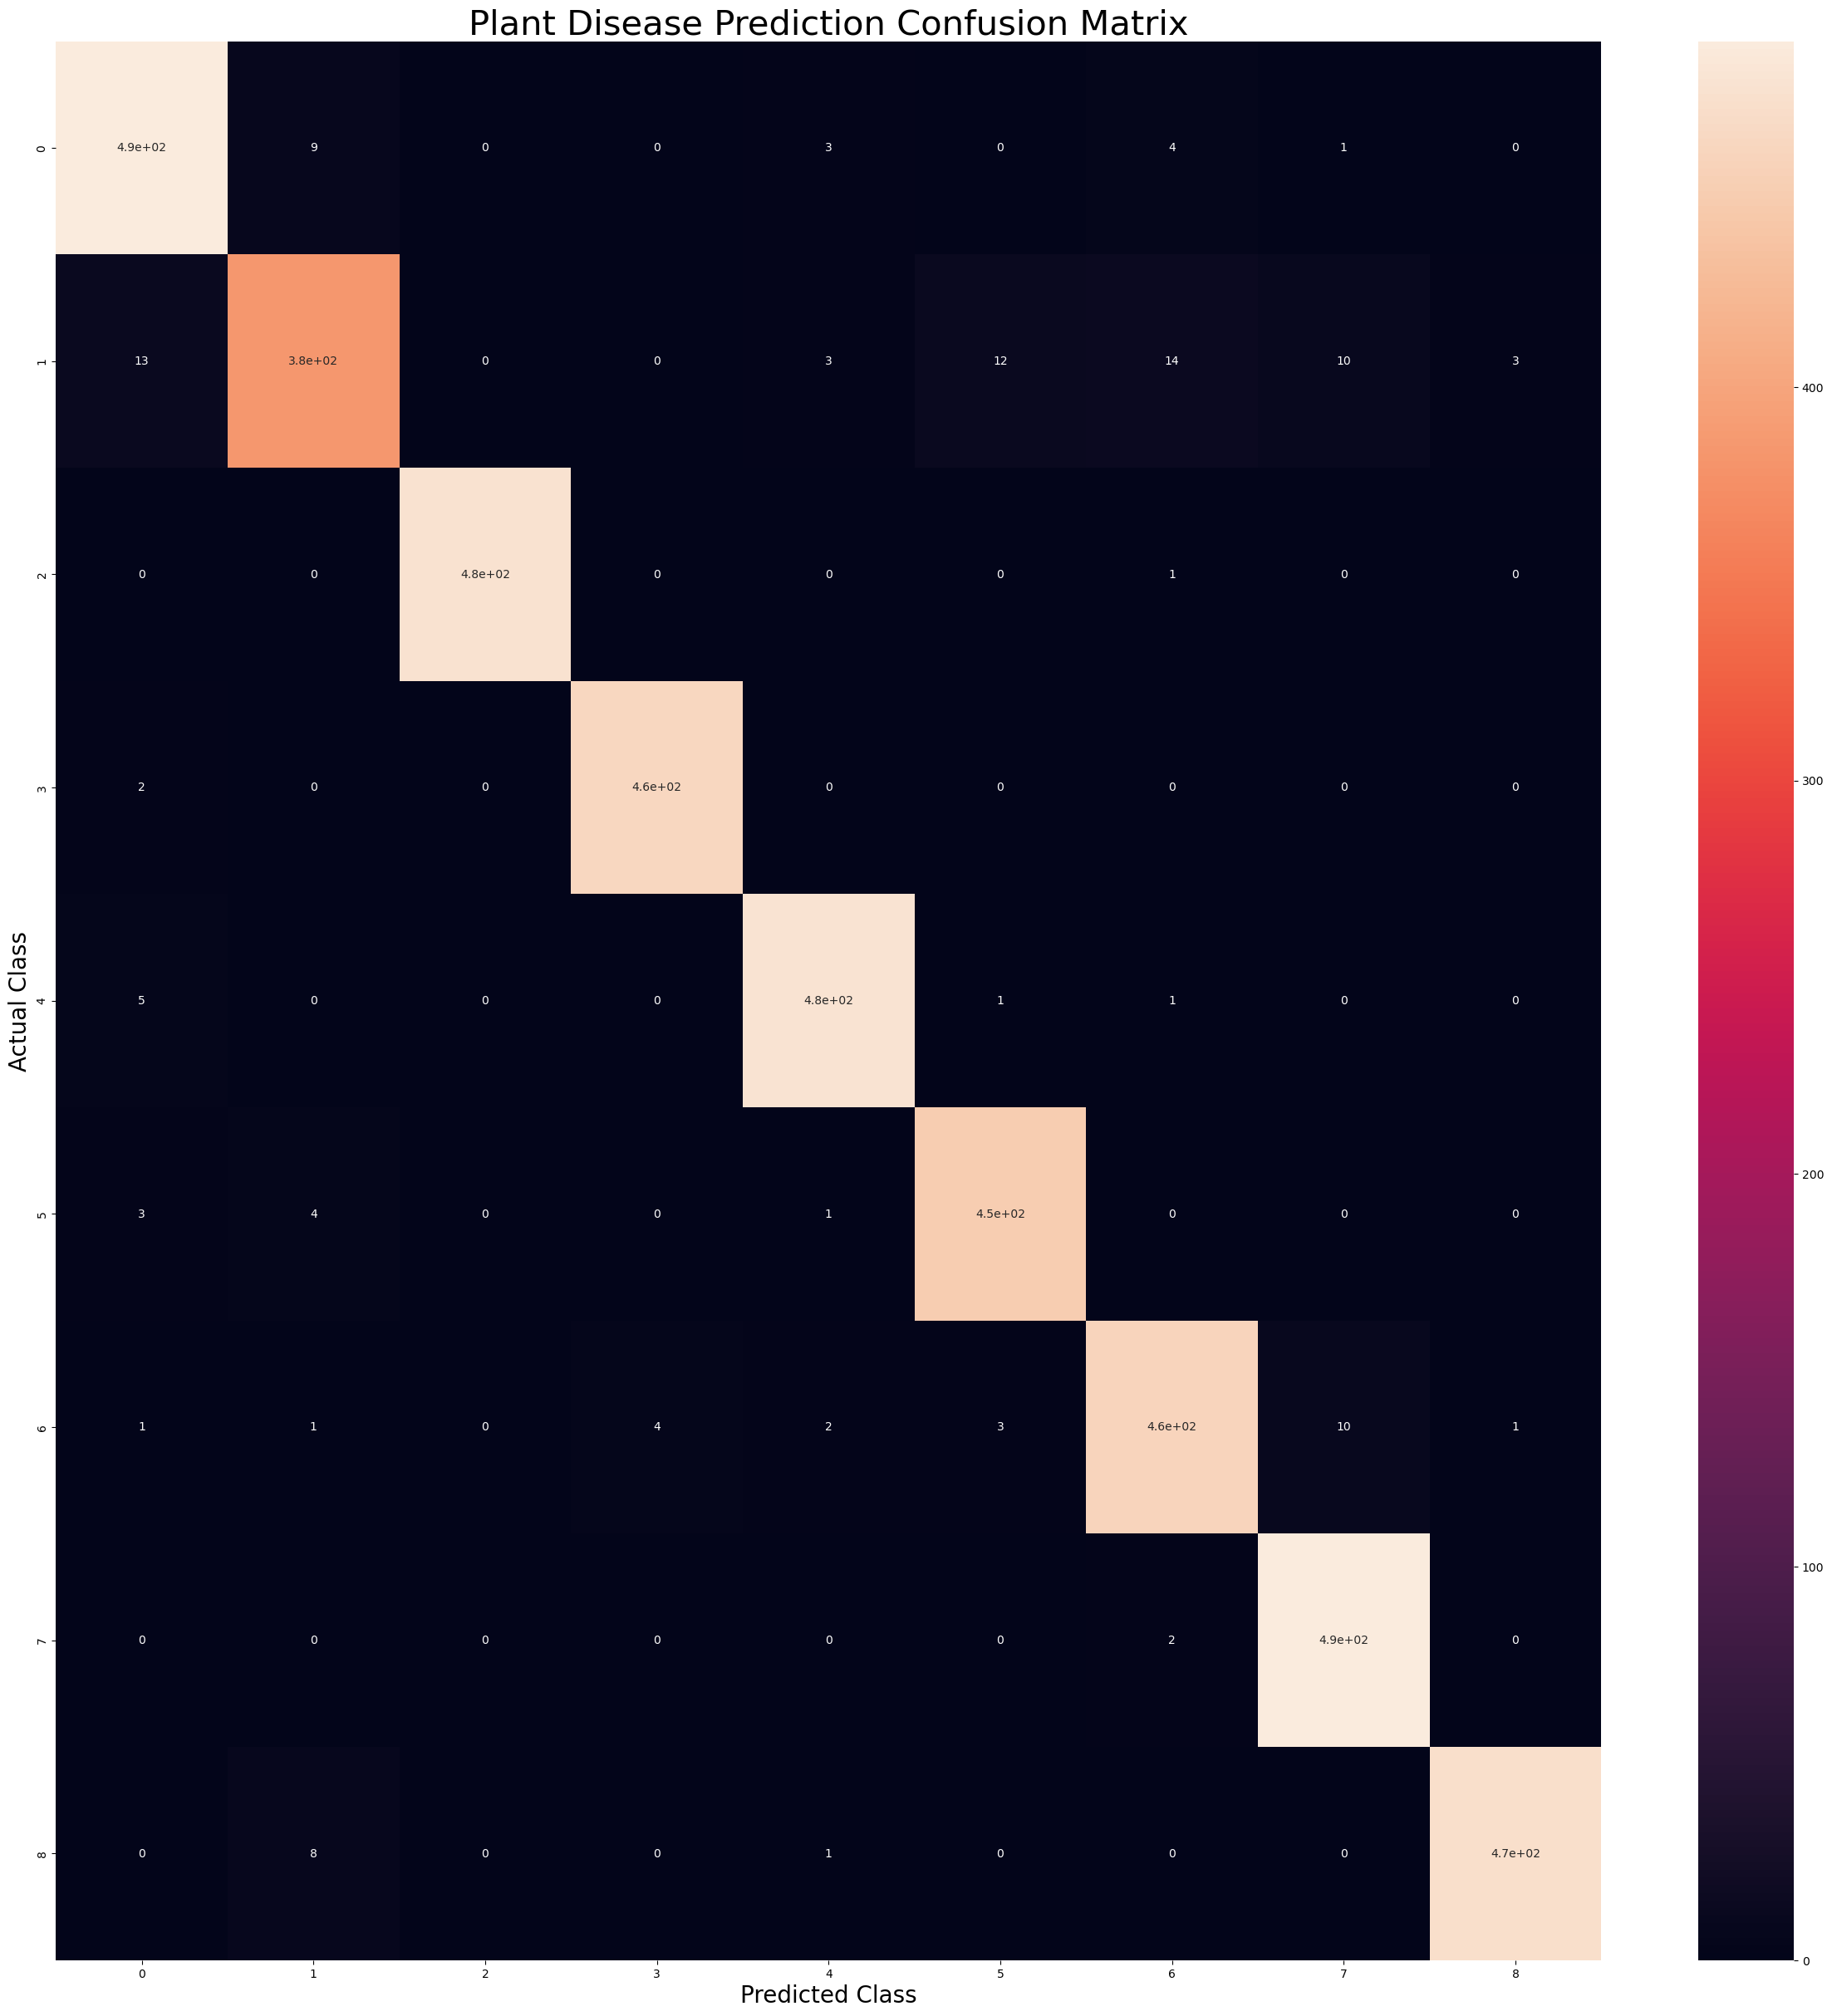

In [37]:
plt.figure(figsize=(30, 30))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 30)
plt.show()